In [9]:
from os import listdir
from os.path import isfile, join
import json
import pandas as pd
import datetime
import seaborn as sns
sns.set(rc={'figure.figsize':(20,10)})

In [2]:
mypath = "../data/revisions/"
file = "rev_article_hi_27-10-2019 21-52-25.json"

with open(mypath + file) as thefile:
        data = json.load(thefile)
        df = pd.DataFrame(data)

In [3]:
df['timestamp'] = df['timestamp'].astype(str)
df.timestamp=df.timestamp.str.replace("T"," ")
df.timestamp=df.timestamp.str.replace("Z","")
# df.to_csv(r'kash_hi.csv')
print(df[:3])

           user            timestamp   size              comment anon
0   SHIVAM VISH  2019-08-31 12:25:53  25886                       NaN
1  Srajaltiwari  2019-08-26 06:35:15  25886                       NaN
2   अनुनाद सिंह  2019-08-17 11:01:09  25902  /* बाहरी कड़ियाँ */  NaN


In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['size'] = pd.to_numeric(df['size'])
df.dtypes
df = df.set_index('timestamp')

In [5]:
# df = df.set_index('timestamp')
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.weekday_name
df.dtypes
df.head()


,user,size,comment,anon,year,month,day
timestamp,,,,,,,
2019-08-31 12:25:53,SHIVAM VISH,25886,,NaN,2019,8,Saturday
2019-08-26 06:35:15,Srajaltiwari,25886,,NaN,2019,8,Monday
2019-08-17 11:01:09,अनुनाद सिंह,25902,/* बाहरी कड़ियाँ */,NaN,2019,8,Saturday
2019-08-17 06:32:12,अनुनाद सिंह,25426,/* इन्हें भी देखें */,NaN,2019,8,Saturday
2019-08-17 06:31:22,अनुनाद सिंह,25420,/* धारा ३७० का विरोध */,NaN,2019,8,Saturday


In [11]:
df = df[df.year != 2014]
df = df[df.year != 2013]
df = df[df.year != 2016]
df = df[df.year != 2015]
df = df[df.year != 2011]
df = df[df.year != 2012]
df = df[df.year != 2017]

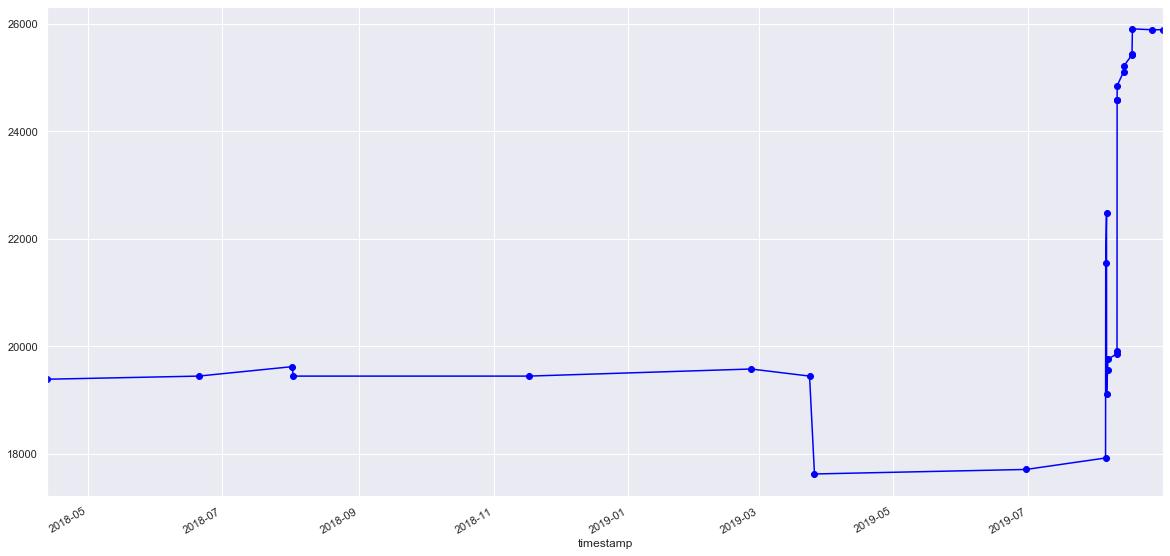

In [12]:
df['size'].plot(marker='o', linestyle='-', linewidth=1.5, color = 'blue')

In [8]:
# df = df.drop(['user', 'anon', 'slots','comment'], axis=1)
df.dtypes
df.to_csv(r'kash_ur.csv')